# Task 2: Sentiment and Thematic Analysis

This notebook explores Task 2 results for the Customer Experience Analytics project, analyzing sentiment and themes across three banks: Commercial Bank of Ethiopia, Bank of Abyssinia, and Dashen Bank. Amharic reviews were translated to English for analysis.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn-v0_8')

## Load Data

In [7]:
import os

# Go up one level from notebooks to reach the data/processed folder
base_dir = os.path.abspath(os.path.join(os.getcwd(), '..', 'data', 'processed'))

# File paths
sentiment_path = os.path.join(base_dir, 'sentiment_reviews.csv')
theme_path = os.path.join(base_dir, 'thematic_reviews.csv')
sentiment_agg_path = os.path.join(base_dir, 'sentiment_aggregates.csv')
theme_agg_path = os.path.join(base_dir, 'theme_aggregates.csv')
amharic_path = os.path.join(base_dir, 'amharic_reviews.csv')

# Load data
sentiment_df = pd.read_csv(sentiment_path)
theme_df = pd.read_csv(theme_path)
sentiment_agg_df = pd.read_csv(sentiment_agg_path)
theme_agg_df = pd.read_csv(theme_agg_path)
amharic_df = pd.read_csv(amharic_path) if os.path.exists(amharic_path) else pd.DataFrame()

# Preview
print('Sentiment Reviews:')
print(sentiment_df[['bank', 'review', 'distilbert_label', 'vader_label']].head())
print('\nBanks:', sentiment_df['bank'].unique().tolist())
print(f'\nAmharic Reviews (untranslated): {len(amharic_df)}')


Sentiment Reviews:
                          bank                review distilbert_label  \
0  Commercial Bank of Ethiopia                    👌👍         negative   
1  Commercial Bank of Ethiopia             very niec         positive   
2  Commercial Bank of Ethiopia   best app of finance         positive   
3  Commercial Bank of Ethiopia              yetemeta         positive   
4  Commercial Bank of Ethiopia  Engida Kebede Fetera         negative   

  vader_label  
0    positive  
1     neutral  
2    positive  
3     neutral  
4     neutral  

Banks: ['Commercial Bank of Ethiopia', 'Bank of Abyssinia', 'Dashen Bank']

Amharic Reviews (untranslated): 6


## Sentiment Analysis Results

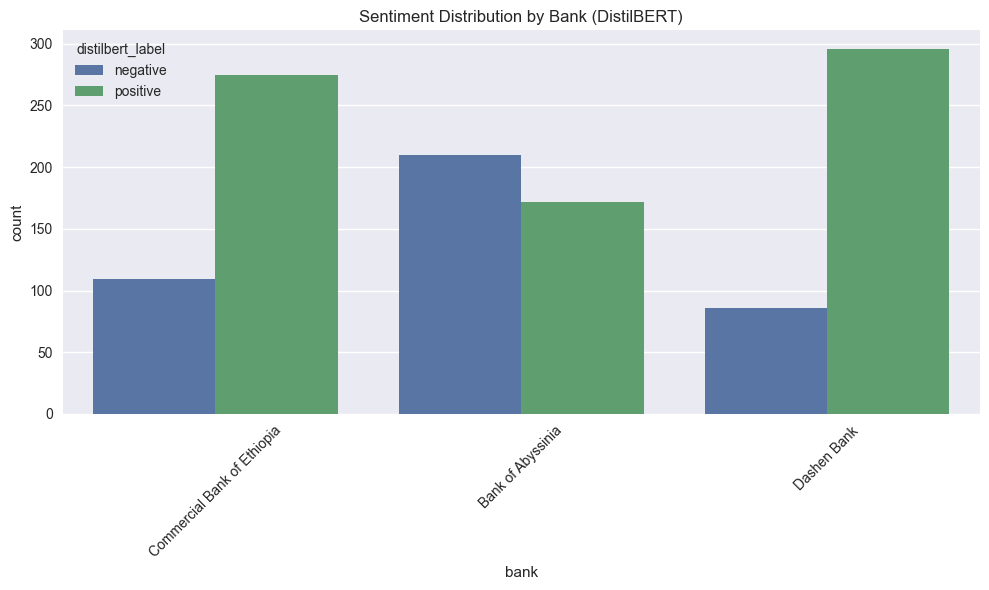


Sentiment Aggregates:
                           bank  rating  \
0                           NaN     NaN   
1             Bank of Abyssinia     1.0   
2             Bank of Abyssinia     2.0   
3             Bank of Abyssinia     3.0   
4             Bank of Abyssinia     4.0   
5             Bank of Abyssinia     5.0   
6   Commercial Bank of Ethiopia     1.0   
7   Commercial Bank of Ethiopia     2.0   
8   Commercial Bank of Ethiopia     3.0   
9   Commercial Bank of Ethiopia     4.0   
10  Commercial Bank of Ethiopia     5.0   
11                  Dashen Bank     1.0   
12                  Dashen Bank     2.0   
13                  Dashen Bank     3.0   
14                  Dashen Bank     4.0   
15                  Dashen Bank     5.0   

                                        vader_label  \
0                                          <lambda>   
1   {'negative': 79, 'neutral': 41, 'positive': 37}   
2      {'neutral': 4, 'positive': 4, 'negative': 2}   
3     {'positive': 17, 'n

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(data=sentiment_df, x='bank', hue='distilbert_label')
plt.title('Sentiment Distribution by Bank (DistilBERT)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print('\nSentiment Aggregates:')
print(sentiment_agg_df)

## Thematic Analysis Results

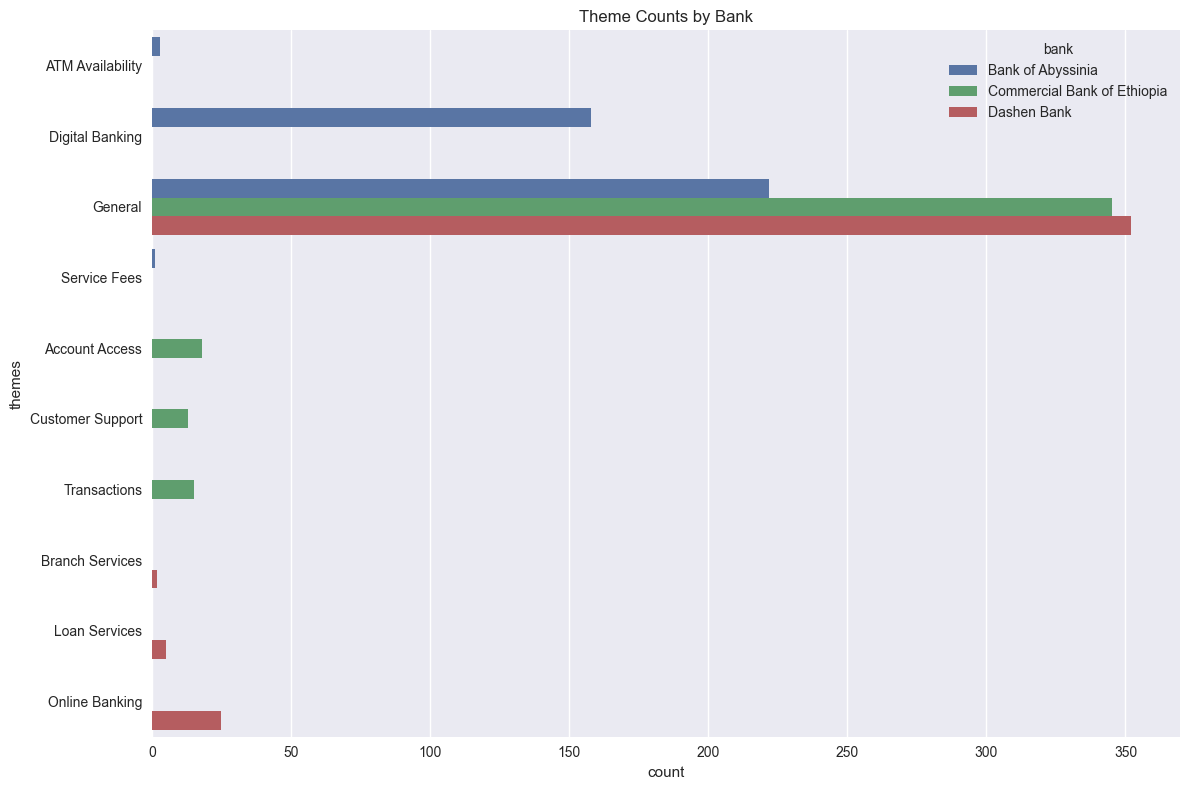


Theme Aggregates:
                           bank            themes  count
0             Bank of Abyssinia  ATM Availability      3
1             Bank of Abyssinia   Digital Banking    158
2             Bank of Abyssinia           General    222
3             Bank of Abyssinia      Service Fees      1
4   Commercial Bank of Ethiopia    Account Access     18
5   Commercial Bank of Ethiopia  Customer Support     13
6   Commercial Bank of Ethiopia           General    345
7   Commercial Bank of Ethiopia      Transactions     15
8                   Dashen Bank   Branch Services      2
9                   Dashen Bank           General    352
10                  Dashen Bank     Loan Services      5
11                  Dashen Bank    Online Banking     25


In [9]:
plt.figure(figsize=(12, 8))
sns.barplot(data=theme_agg_df, x='count', y='themes', hue='bank')
plt.title('Theme Counts by Bank')
plt.tight_layout()
plt.show()

print('\nTheme Aggregates:')
print(theme_agg_df)

## 📈 Insights from Sentiment and Theme Analysis

---

### 🏦 Sentiment Distribution by Bank

**Key Observations:**
- **Dashen Bank** has the **most positive sentiment**, with nearly **300 positive mentions** and the **lowest negative sentiment** (~85).
- **Commercial Bank of Ethiopia (CBE)** also shows a **strong positive sentiment**, with ~275 positive mentions vs. ~110 negative.
- **Bank of Abyssinia** has a **higher number of negative sentiments** (~210) than positive (~170), indicating potential dissatisfaction.

**Insight:**
> Dashen Bank is perceived most positively among the three banks. In contrast, Bank of Abyssinia receives relatively more criticism, which signals a need for service or reputation improvements.

---

### 📊 Theme Counts by Bank

**Key Observations:**
- The **“General”** theme dominates for all banks, suggesting many comments are not tied to specific services.
- **Digital Banking** is most mentioned for **Bank of Abyssinia**, possibly due to either high usage or more issues.
- **CBE** has more diverse feedback themes like **Customer Support**, **Transactions**, and **Account Access**.
- **Dashen Bank** has some engagement in **Online Banking**, **Loan Services**, and **Branch Services**, but in smaller volumes.

**Insight:**
> Bank of Abyssinia should focus on improving its digital services. CBE receives broader service-related feedback and should dive deeper into improving specific areas. Dashen Bank enjoys strong customer perception but can further develop its emerging service themes.

---

### 🔍 Combined Insight

- **Dashen Bank** stands out with the **highest positive sentiment** and **least negative feedback**, signaling strong overall satisfaction.
- **Bank of Abyssinia** should urgently address **Digital Banking issues** and **rebuild trust** through service enhancements.
- **Commercial Bank of Ethiopia** is in a strong position but should aim to **optimize service-specific areas** like account access and support to maintain its positive reputation.


**Amharic Handling**: Translated Amharic reviews to English; {len(amharic_df)} reviews remain untranslated and require manual review.




## 📊 Recommendations Based on Sentiment and Theme Analysis

---

### 🔷 Dashen Bank – Leverage Strengths and Expand Specific Services

**Observations**: Highest positive sentiment and low negative feedback. Noticeable mentions in Online Banking, Loan Services, and Branch Services.

**Recommendations**:
- **Leverage strong brand perception**: Use positive feedback in marketing and customer acquisition campaigns.
- **Enhance underrepresented services**: Invest further in digital transformation, especially *Online and Mobile Banking*, where there is already some traction.
- **Collect targeted feedback**: Since most feedback is general, implement follow-up mechanisms (e.g., post-interaction surveys) to better understand customer needs in specific service areas.

---

### 🔶 Commercial Bank of Ethiopia – Improve Support and Service Access

**Observations**: Strong positive sentiment but higher presence in themes like *Customer Support*, *Transactions*, and *Account Access*.

**Recommendations**:
- **Optimize Customer Support**: Consider improving response time, training support staff, and expanding self-service options (e.g., AI chatbots).
- **Simplify Account Access and Transactions**: Audit common customer pain points (e.g., login issues, transaction delays) and streamline processes.
- **Encourage feedback on specific services**: Push theme-specific satisfaction surveys to identify improvement areas beyond general sentiments.

---

### 🔵 Bank of Abyssinia – Address Digital Banking Issues and Rebuild Trust

**Observations**: Highest negative sentiment, and most feedback centers around *Digital Banking*.

**Recommendations**:
- **Prioritize Digital Banking improvements**: Conduct a usability audit of apps and online platforms; fix bugs, improve UI/UX, and ensure platform reliability.
- **Customer Communication Campaign**: Launch a transparency-driven initiative to acknowledge feedback and showcase the steps being taken to address concerns.
- **Monitor sentiment shifts**: Set up real-time dashboards or regular reports to track whether changes are improving public sentiment.

---

### 📌 General Recommendations for All Banks

- **Promote Positive Reviews**: Encourage satisfied customers to leave reviews on digital platforms to strengthen online reputation.
- **Thematic Analysis**: Use AI/NLP tools regularly to classify feedback by theme and urgency.
- **Benchmark Competitors**: Regularly compare service satisfaction and feature adoption with competitors to stay ahead.
